**Reasoning**:
Load the dataset "Final_Dataset.csv" into a pandas DataFrame named `df`.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/content/Final_Dataset.csv')
display(df.head())

display(df.isnull().sum())

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,Hemoglobin_Level,Thyroid_Condition,RiskLevel
0,25,130,80,15.0,98.0,86,9.81,Yes,High Risk
1,35,140,90,13.0,98.0,70,14.13,Yes,High Risk
2,29,90,70,8.0,100.0,80,12.49,Yes,High Risk
3,30,140,85,7.0,98.0,70,11.49,Yes,High Risk
4,35,120,60,6.1,98.0,76,8.17,No,Low Risk


,0
Age,0
SystolicBP,0
DiastolicBP,0
BS,0
BodyTemp,0
HeartRate,0
Hemoglobin_Level,0
Thyroid_Condition,0
RiskLevel,0


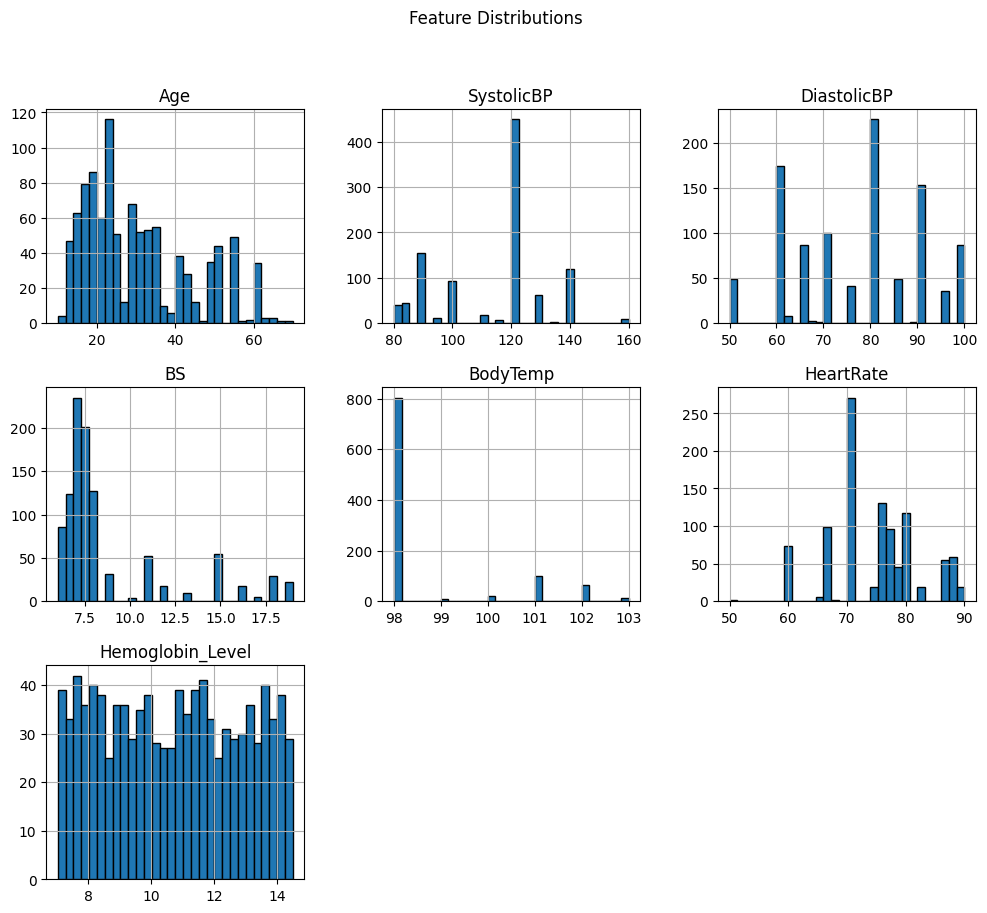

In [ ]:
if 'RiskLevel' in df.columns:
    df.hist(figsize=(12, 10), bins=30, edgecolor='black')
    plt.suptitle("Feature Distributions")
    plt.show()

## Data exploration



**Reasoning**:
Examine the data shape, info, descriptive statistics, analyze categorical features, target variable, and correlation to understand the dataset characteristics.



In [ ]:
# Examine Data Shape and Info
print("Data Shape:", df.shape)
print("\nData Info:")
display(df.info())

Data Shape: (1014, 9)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                1014 non-null   int64  
 1   SystolicBP         1014 non-null   int64  
 2   DiastolicBP        1014 non-null   int64  
 3   BS                 1014 non-null   float64
 4   BodyTemp           1014 non-null   float64
 5   HeartRate          1014 non-null   int64  
 6   Hemoglobin_Level   1014 non-null   float64
 7   Thyroid_Condition  1014 non-null   object 
 8   RiskLevel          1014 non-null   object 
dtypes: float64(3), int64(4), object(2)
memory usage: 71.4+ KB


None

In [ ]:
# Summarize Numerical Features
print("\nDescriptive Statistics for Numerical Features:")
display(df.describe())


Descriptive Statistics for Numerical Features:


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,Hemoglobin_Level
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.375740,76.485207,8.725986,98.665089,74.386588,10.687505
std,13.474386,18.047755,13.837774,3.293532,1.371384,7.592305,2.193372
min,10.000000,80.000000,50.000000,6.000000,98.000000,50.000000,7.030000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000,8.780000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000,10.740000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000,12.597500
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000,14.500000


In [ ]:
# Analyze Categorical Features
print("\nAnalysis of Categorical Features:")
for col in ['Thyroid_Condition', 'RiskLevel']:  # Analyze 'Thyroid_Condition' and 'RiskLevel'
    print(f"\nColumn: {col}")
    print(f"Unique values: {df[col].unique()}")
    print(f"Value counts:\n{df[col].value_counts()}")



Analysis of Categorical Features:

Column: Thyroid_Condition
Unique values: ['Yes' 'No']
Value counts:
Thyroid_Condition
No     579
Yes    435
Name: count, dtype: int64

Column: RiskLevel
Unique values: ['High Risk' 'Low Risk' 'Mid Risk']
Value counts:
RiskLevel
Low Risk     406
Mid Risk     336
High Risk    272
Name: count, dtype: int64



Target Variable Analysis (RiskLevel):
Data type: object
Unique values: ['High Risk' 'Low Risk' 'Mid Risk']
Value counts:
RiskLevel
Low Risk     406
Mid Risk     336
High Risk    272
Name: count, dtype: int64


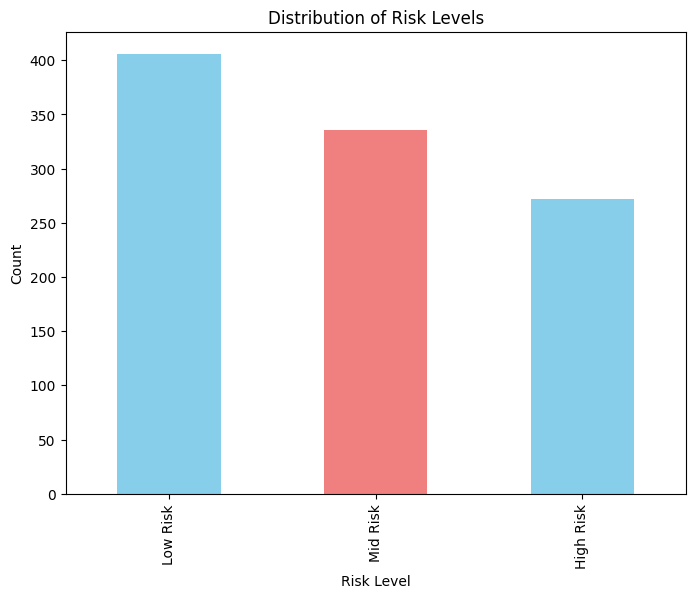


Correlation Analysis:


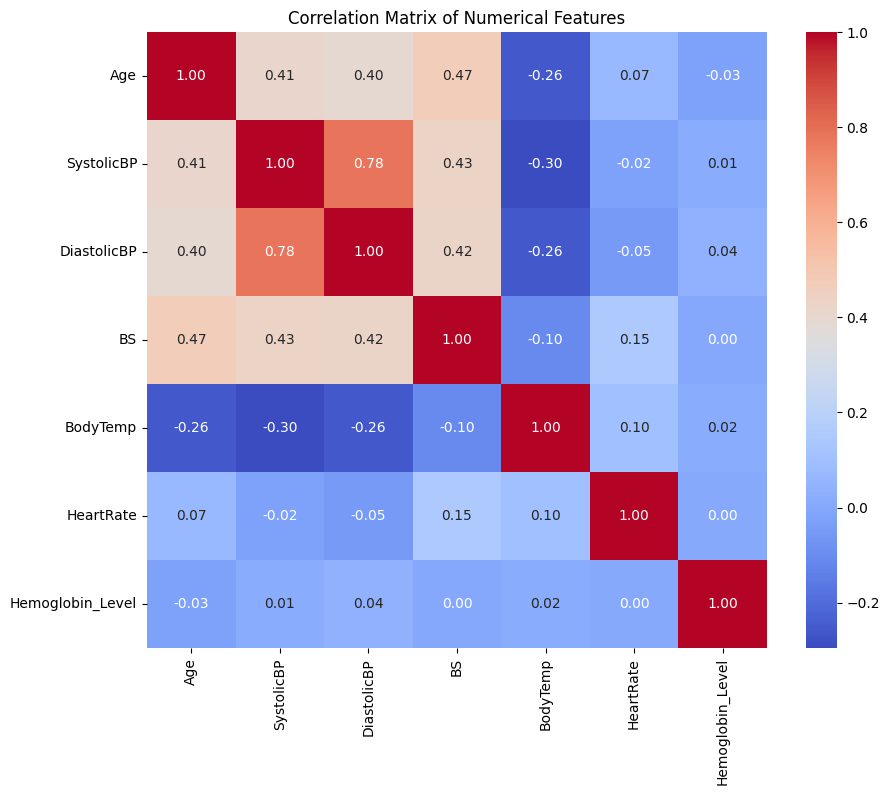

In [ ]:
# Target Variable Analysis
print("\nTarget Variable Analysis (RiskLevel):")
print(f"Data type: {df['RiskLevel'].dtype}")
print(f"Unique values: {df['RiskLevel'].unique()}")
print(f"Value counts:\n{df['RiskLevel'].value_counts()}")
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
df['RiskLevel'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Distribution of Risk Levels')
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.show()


# Correlation Analysis
print("\nCorrelation Analysis:")
numerical_cols = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Data cleaning

### Subtask:
Clean the data by handling missing values and outliers.


**Reasoning**:
Identify missing values, handle them by imputation or dropping, detect and handle outliers in numerical features using IQR method.



In [ ]:
# Identify missing values
print("Missing values per column:\n", df.isnull().sum())

# Detect and handle outliers for numerical features
numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

display(df.head())
print("Missing values per column after handling:\n", df.isnull().sum())

Missing values per column:
 Age                  0
SystolicBP           0
DiastolicBP          0
BS                   0
BodyTemp             0
HeartRate            0
Hemoglobin_Level     0
Thyroid_Condition    0
RiskLevel            0
dtype: int64


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,Hemoglobin_Level,Thyroid_Condition,RiskLevel
0,25,130,80,9.65,98.0,86,9.81,Yes,High Risk
1,35,140,90,9.65,98.0,70,14.13,Yes,High Risk
2,29,90,70,8.00,98.0,80,12.49,Yes,High Risk
3,30,140,85,7.00,98.0,70,11.49,Yes,High Risk
4,35,120,60,6.10,98.0,76,8.17,No,Low Risk


Missing values per column after handling:
 Age                  0
SystolicBP           0
DiastolicBP          0
BS                   0
BodyTemp             0
HeartRate            0
Hemoglobin_Level     0
Thyroid_Condition    0
RiskLevel            0
dtype: int64


## Feature engineering

### Subtask:
Engineer new features from the existing ones in the cleaned dataset.


**Reasoning**:
Create interaction features, one-hot encode 'Thyroid_Condition', and potentially create polynomial features and scale numerical features.



In [ ]:
df['BP_Ratio'] = df['SystolicBP'] / df['DiastolicBP']

# 2. Risk Score Calculation
df['Risk_Score'] = (df['BS'] * 0.3) + (df['Age'] * 0.2) + (df['SystolicBP'] * 0.15)

# 3. Hemoglobin Groups
df['Hemoglobin_Group'] = pd.qcut(df['Hemoglobin_Level'],
                               q=4,
                               labels=['Low', 'Medium', 'High', 'Very High'])

# 4. Advanced Interaction Features
df['Age_BP_Interaction'] = df['Age'] * (df['SystolicBP'] + df['DiastolicBP'])
df['BS_HeartRate_Interaction'] = df['BS'] * df['HeartRate']


# Create dummy variables
df = pd.get_dummies(df, columns=['Hemoglobin_Group'])

# Convert binary features
df['Thyroid_Condition'] = df['Thyroid_Condition'].map({'Yes': 1, 'No': 0})

# Encode target variable
risk_order = {'Low Risk': 0, 'Mid Risk': 1, 'High Risk': 2}
df['RiskLevel'] = df['RiskLevel'].map(risk_order)

# Handle missing values
df.dropna(inplace=True)
display(df.head())

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,Hemoglobin_Level,Thyroid_Condition,RiskLevel,BP_Ratio,Risk_Score,Age_BP_Interaction,BS_HeartRate_Interaction,Hemoglobin_Group_Low,Hemoglobin_Group_Medium,Hemoglobin_Group_High,Hemoglobin_Group_Very High
0,25,130,80,9.65,98.0,86,9.81,1,2,1.625000,27.395,5250,829.9,False,True,False,False
1,35,140,90,9.65,98.0,70,14.13,1,2,1.555556,30.895,8050,675.5,False,False,False,True
2,29,90,70,8.00,98.0,80,12.49,1,2,1.285714,21.700,4640,640.0,False,False,True,False
3,30,140,85,7.00,98.0,70,11.49,1,2,1.647059,29.100,6750,490.0,False,False,True,False
4,35,120,60,6.10,98.0,76,8.17,0,0,2.000000,26.830,6300,463.6,True,False,False,False


## Data splitting

### Subtask:
Split the data into training, validation, and testing sets.


**Reasoning**:
Split the data into training, validation, and testing sets using stratified sampling.



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']

smote = SMOTE(random_state=42, k_neighbors=5)
X_res, y_res = smote.fit_resample(X, y)
print("Resampled dataset shape:", X_res.shape, y_res.shape)


# Define parameter grid for tuning
param_grid = {
    'n_estimators': [200, 500],
    'max_depth': [15, 20, 25],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced_subsample', None]
}

# Initialize model with cross-validation
rf = RandomForestClassifier(random_state=32)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=32)
grid_search = GridSearchCV(rf, param_grid, cv=skf, scoring='accuracy', n_jobs=-1)

# Train model
grid_search.fit(X_res, y_res)

# Get best model
best_rf = grid_search.best_estimator_

# --------------------------
# Final Training & Evaluation
# --------------------------

# Split data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, stratify=y_res, random_state=32
)

best_rf.fit(X_train, y_train)

# --------------------------
# Results Analysis
# --------------------------

# Predictions
y_pred = best_rf.predict(X_test)

# Metrics
print(f"Best Parameters: {grid_search.best_params_}")
print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 Features:")
print(feature_importance.head(10))
df.to_csv('Feature_Engineered_Dataset.csv', index=False)



Resampled dataset shape: (1218, 16) (1218,)
Best Parameters: {'class_weight': 'balanced_subsample', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}

Accuracy: 0.9098

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        81
           1       0.87      0.87      0.87        82
           2       0.95      0.95      0.95        81

    accuracy                           0.91       244
   macro avg       0.91      0.91      0.91       244
weighted avg       0.91      0.91      0.91       244


Confusion Matrix:
[[74  7  0]
 [ 7 71  4]
 [ 0  4 77]]

Top 10 Features:
                     Feature  Importance
7          Thyroid_Condition    0.224451
3                         BS    0.156730
11  BS_HeartRate_Interaction    0.104353
9                 Risk_Score    0.089183
1                 SystolicBP    0.087125
6           Hemoglobin_Level    0.073905
10        Age_BP_Interaction  

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Ensure Label Encoding is consistent
le = LabelEncoder()
y_res_encoded = le.fit_transform(y_res)  # Fit encoder on training labels

# Define a sample patient for prediction
# Include ALL features used during training:
sample_data = {
    "Age": 35,
    "SystolicBP": 120,
    "DiastolicBP": 80,
    "BS": 7.0,
    "BodyTemp": 98.6,
    "HeartRate": 72,
    "Hemoglobin_Level": 14.0,
    "Thyroid_Condition": 0,  # Assuming 0 represents 'No'
    "BP_Ratio": 120 / 80,  # Calculate BP_Ratio
    "Risk_Score": (7.0 * 0.3) + (35 * 0.2) + (120 * 0.15),  # Calculate Risk_Score
    "Age_BP_Interaction": 35 * (120 + 80),  # Calculate Age_BP_Interaction
    "BS_HeartRate_Interaction": 7.0 * 72,  # Calculate BS_HeartRate_Interaction
    "Hemoglobin_Group_Low": 0,  # One-hot encoded Hemoglobin_Group
    "Hemoglobin_Group_Medium": 0,  # One-hot encoded Hemoglobin_Group
    "Hemoglobin_Group_High": 1,  # One-hot encoded Hemoglobin_Group
    "Hemoglobin_Group_Very High": 0  # One-hot encoded Hemoglobin_Group
}

# Convert sample data to DataFrame using the columns from X_res
sample_df = pd.DataFrame([sample_data], columns=X_res.columns)

# Predict risk level
predicted_risk_encoded = best_rf.predict(sample_df)[0]

# Decode prediction to original risk level
predicted_risk = le.inverse_transform([predicted_risk_encoded])[0]

print("\nSample Patient Details:")
print(sample_data)
print(f"Predicted Risk Level: {predicted_risk}")


Sample Patient Details:
{'Age': 35, 'SystolicBP': 120, 'DiastolicBP': 80, 'BS': 7.0, 'BodyTemp': 98.6, 'HeartRate': 72, 'Hemoglobin_Level': 14.0, 'Thyroid_Condition': 0, 'BP_Ratio': 1.5, 'Risk_Score': 27.1, 'Age_BP_Interaction': 7000, 'BS_HeartRate_Interaction': 504.0, 'Hemoglobin_Group_Low': 0, 'Hemoglobin_Group_Medium': 0, 'Hemoglobin_Group_High': 1, 'Hemoglobin_Group_Very High': 0}
Predicted Risk Level: 1


In [ ]:
import pickle

# Save the trained RandomForest model
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(best_rf, model_file)

# Save the LabelEncoder
with open('label_encoder.pkl', 'wb') as encoder_file:
    pickle.dump(le, encoder_file)

# Save the feature names (useful for future inference)
with open('feature_names.pkl', 'wb') as feature_file:
    pickle.dump(X_res.columns.tolist(), feature_file)

print("Model, Label Encoder, and Feature Names saved successfully!")



Model, Label Encoder, and Feature Names saved successfully!


In [ ]:
import pandas as pd
import pickle

# Load the saved model, label encoder, and feature names
with open('random_forest_model.pkl', 'rb') as model_file:
    best_rf = pickle.load(model_file)

with open('label_encoder.pkl', 'rb') as encoder_file:
    le = pickle.load(encoder_file)

with open('feature_names.pkl', 'rb') as feature_file:
    feature_names = pickle.load(feature_file)

# Define a sample patient for prediction
sample_data = {
    "Age": 45,
    "SystolicBP": 130,
    "DiastolicBP": 85,
    "BS": 8.5,
    "BodyTemp": 99.1,
    "HeartRate": 75,
    "Hemoglobin_Level": 13.5,
    "Thyroid_Condition": 1,  # Assuming 1 represents 'Yes'
    "BP_Ratio": 130 / 85,  # Calculate BP_Ratio
    "Risk_Score": (8.5 * 0.3) + (45 * 0.2) + (130 * 0.15),  # Calculate Risk_Score
    "Age_BP_Interaction": 45 * (130 + 85),  # Calculate Age_BP_Interaction
    "BS_HeartRate_Interaction": 8.5 * 75,  # Calculate BS_HeartRate_Interaction
    "Hemoglobin_Group_Low": 0,  # One-hot encoded Hemoglobin_Group
    "Hemoglobin_Group_Medium": 1,  # One-hot encoded Hemoglobin_Group
    "Hemoglobin_Group_High": 0,  # One-hot encoded Hemoglobin_Group
    "Hemoglobin_Group_Very High": 0  # One-hot encoded Hemoglobin_Group
}

# Convert to DataFrame, ensuring correct column order
sample_df = pd.DataFrame([sample_data], columns=feature_names)

# Predict risk level
predicted_risk_encoded = best_rf.predict(sample_df)[0]

# Decode the predicted value back to the original category
predicted_risk = le.inverse_transform([predicted_risk_encoded])[0]

print("\nSample Patient Data:")
print(sample_data)
print(f"Predicted Risk Level: {predicted_risk}")



Sample Patient Data:
{'Age': 45, 'SystolicBP': 130, 'DiastolicBP': 85, 'BS': 8.5, 'BodyTemp': 99.1, 'HeartRate': 75, 'Hemoglobin_Level': 13.5, 'Thyroid_Condition': 1, 'BP_Ratio': 1.5294117647058822, 'Risk_Score': 31.05, 'Age_BP_Interaction': 9675, 'BS_HeartRate_Interaction': 637.5, 'Hemoglobin_Group_Low': 0, 'Hemoglobin_Group_Medium': 1, 'Hemoglobin_Group_High': 0, 'Hemoglobin_Group_Very High': 0}
Predicted Risk Level: 2
